<a href="https://colab.research.google.com/github/bonifasius-baskoro/shopee_workshop/blob/main/Shopee_Workshop_Sentiment_Analysis_%5BFinal%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 1: Understand the basic of Tokenizer and Padding of Tensorflow

## Tokenization


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# Our sentences
sentences =[
            'i love my dog',
            'I, love my cat'
]

**num_word is the maximum number of words we gonna keep. It is ok because we have only two sentences now, but imagine we got hundreds of books to tokenize, and we just want 100 words in all of that.**

In [ ]:
tokenizer = Tokenizer(num_words=100)

In [ ]:
tokenizer.fit_on_texts(sentences)

In [ ]:
word_index = tokenizer.word_index
print(word_index)

**The tokenizer is smart enough to catch some exceptions like this! Note that dog with "!"**

In [ ]:
# Our sentences
sentences =[
            'i love my dog',
            'I, love my cat',
            'You love my dog!'
]

In [ ]:
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

You can see how words can be tokenized and tools in Tensorflow can handle that for you.

Now your words are represented by numbers like this then you need to represent your sentences by sequences of numbers in the correct order. 

## Turning sentences into data

Time to create sequences from sentences!

Let try a different example, this time **these sentences will have different lengths.**

In [ ]:
# Our sentences
sentences =[
            'i love my dog',
            'I, love my cat',
            'You love my dog!',
            'Do you think my dog is amazing?'
]

In [ ]:
tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [ ]:
print(word_index)

**text_to_sequences will create sequences of tokens representing each sentence.**

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
sequences

You can make sense of the first sentence which is "I love my dog" -> [4, 2, 1, 3]

**What about the words that our model never seen before?**

In this example, we will have **new words "really" and "food"**

In [ ]:
# Try with new setences
test_data=[
           'i really love my dog',
           'my dog loves my food'
]

In [ ]:
test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

In [ ]:
print(word_index)

**So you can imagine that you need a really big word index to handle sentences that are not in the training set.**

**In order to not lose the length of sequence like above, there is a trick for that!**

**We will create a unique word that would never be in any text like "\<OOV\>"**. Then we can replace words which we never seen before with OOV instead!

In [ ]:
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

In [ ]:
test_seq=tokenizer.texts_to_sequences(test_data)
print(test_seq)

In [ ]:
test_data

Now, all sequences will have the same length of our original sentences. Pretty neat trick right?

Another problem is that how our model can handle sequences with different sizes/lengths because remember when we train images, they are needed to be the same size/length.

## Padding sequences

In [ ]:
# Our sentences
sentences =[
            'i love my dog',
            'I, love my cat',
            'You love my dog!',
            'Do you think my dog is amazing?'
]

In [ ]:
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


In [ ]:
sequences=tokenizer.texts_to_sequences(sentences)
print(sequences)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
padded = pad_sequences(sequences)
print(padded)

Nice, so it is padded at the beginining!

What if we want to pad them at the end?

In [ ]:
padded = pad_sequences(sequences, padding='post')
print(padded)

We can even set the max_len instead of use the maximum length of the longest sentence. 

If the sentence is too long for our max_len, we can truncate/remove some words to fit it (truncate=post or pre)

In [ ]:
padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=6)
print(padded)

In [ ]:
padded = pad_sequences(sequences, padding='post', truncating='pre', maxlen=6)
print(padded)

Now you know how to tokenize text into numeric values and how to regulaize and pad those text. So the preprocession is done!

Time to train our juicy network model with these representations of sentences to detect if a sentence is sarcastic or not! However, how can we make sure these numbers be meaningful when it comes to sentiment analysis ? So we need Embedding !

## Embedding Layer

The above is your full embedded matrix. We need to find a way to retrieve correct embedded vector for each word and then for each sentence!

![alt text](https://i.imgur.com/z3qObl7.png)

In [ ]:
from tensorflow.keras import layers

In [ ]:
vocab_size = 12 
embedding_dim = 3 # can be represented for good, bad, fun
embedding_layer = layers.Embedding(vocab_size, embedding_dim)

In [ ]:
embedding_layer.input_dim, embedding_layer.output_dim

In [ ]:
result = embedding_layer(tf.constant([0,1,2,3,4,5,6,7,8,9,10,11]))
result.numpy()

In [ ]:
result = embedding_layer(tf.constant([0,1,2,1,2,3]))
result.numpy()

In [ ]:
# Our sentences
sentences =[
            'i love my dog',
            'I, love my cat',
            'You love my dog!',
            'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
word_index

In [ ]:
sequences

In [ ]:
padded = pad_sequences(sequences, padding='post', truncating='pre', maxlen=6)
print(padded)

In [ ]:
padded.shape

In [ ]:
first_sentence = padded[0]
first_sentence

In [ ]:
word_index

In [ ]:
len(first_sentence)

In [ ]:
# embedding for 1 sentence
result=embedding_layer(tf.constant(first_sentence))
print(result.shape)
result.numpy()

In [ ]:
# embedding for every sentence
result=embedding_layer(tf.constant(padded))
print(result.shape)
result.numpy()

# Stage 2: IMBD Sentiment Analysis with simple neural network model

## Prepare the data

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 100
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

Let's import tensorflow datasets library and download IDMB text reviews dataset!

In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteCJ9WNA/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteCJ9WNA/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteCJ9WNA/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
len(training_sentences)

25000

In [ ]:
print("Sentence:", training_sentences[0])
print("Label:", training_labels[0])
print("---------------------------------")
print("Sentence:", training_sentences[1])
print("Label:", training_labels[1])
print("---------------------------------")
print("Sentence:", training_sentences[3])
print("Label:", training_labels[3])
print("---------------------------------")
print("Sentence:", training_sentences[5])
print("Label:", training_labels[5])

Sentence: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Label: 0
---------------------------------
Sentence: I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asl

Time to tokenize our sentences and pad them!

In [ ]:
# For Training Data:

# create a tokenizer with num_words and oov_token attributes
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# use that tokenizer to fit the training sentences we got above
tokenizer.fit_on_texts(training_sentences)

# retrieve the word_index back from the tokenizer
word_index = tokenizer.word_index

# use the tokenizer we have fitted on the training sentences and create encoded sequences of index of training setences
sequences = tokenizer.texts_to_sequences(training_sentences)

# remember to pad the sequences for them to be on the same length with max_len and truncating attributes
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


# For Testing Data: 

# we only use the same tokenize we got above and create encoded sequences of index of test setences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

# remember to pad the sequences for them to be on the same length with max_len and truncating attributes
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

If you implements the above code correctly, this decode should give you back the original text from encoded sequences.

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print("Original:", training_sentences[0])
print("Tokenize:", sequences[0])
print("Reduce or Padded:", padded[0])
print("Decode:", decode_review(padded[0]))
print("Label:", training_labels_final[0])

Original: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Tokenize: [12, 14, 33, 425, 392, 18, 90, 28, 1, 9, 32, 1366, 3585, 40, 486, 1, 197, 24, 85, 154, 19, 12, 213, 329, 28, 66, 247, 215, 9, 477, 58, 66, 85, 114, 98, 22, 5675, 12, 1322, 643, 767, 12, 18, 7, 33, 400, 8170, 176, 2455, 416, 2, 89, 1231, 137, 69, 146, 52, 2, 1, 7577, 69,

It's always good to visualize training and validation loss or accuracy after training the model!

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## Embedding layer with Flatten Layer


In [ ]:
# YOUR CODE
# Build model with Flatten(), a Fully Connected Layer like 8 neurons and the last layer is a Fully Connected Layer with 1 neuron with activation is 'sigmoid'

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # your code
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 80008     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,080,017
Trainable params: 1,080,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 15s 15ms/step - loss: 0.5668 - accuracy: 0.6789 - val_loss: 0.3801 - val_accuracy: 0.8296
Epoch 2/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1490 - accuracy: 0.9491 - val_loss: 0.4903 - val_accuracy: 0.8019
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0125 - accuracy: 0.9987 - val_loss: 0.5566 - val_accuracy: 0.8151
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5925 - val_accuracy: 0.8189
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 5.6907e-04 - accuracy: 1.0000 - val_loss: 0.6266 - val_accuracy: 0.8202
Epoch 6/10
782/782 [==============================] - 12s 16ms/step - loss: 2.8672e-04 - accuracy: 1.0000 - val_loss: 0.6536 - val_accuracy: 0.8214
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 1.7290e-04 - accuracy: 1.0000 - val_loss: 0.6810 - v

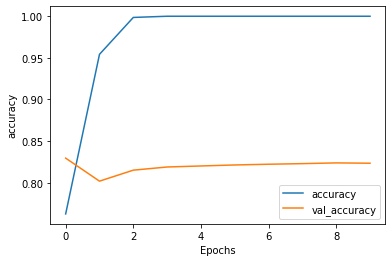

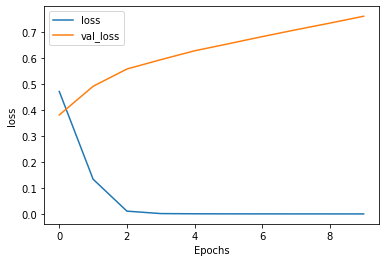

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Prediction sentiment of some sentences

In [ ]:
# YOUR CODE
# Hopefully, the first and third sentences are positive and middle one is negative

sentence = ["I really think this is amazing. honest.", "It sucks and so bad", "I love it so much!"]
sequences = tokenizer.texts_to_sequences(sentence)
print("Sequences:", sequences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print("Padded:", padded)
print("Prediction:", model.predict(padded))

Sequences: [[11, 64, 102, 12, 7, 478, 1200], [10, 1870, 3, 36, 76], [11, 117, 10, 36, 74]]
Padded: [[  11   64  102   12    7  478 1200    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  10 1870    3   36   76    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   

### Export the Embedding layer into vecs and meta files to visualise 

Run this code to export the values of vectors in embedding (vecs.tsv) and coressponding words (meta.tsv). Thus, you will have two files in total.

Remember to click "Allow to download multiple files" on Chrome to download two files at the same time!

Open http://projector.tensorflow.org/ and load those two files you just download so see the visualization in 3D or 2D of your word embedding!

In [ ]:
import io
def export_embedding_tsv(model):
  e = model.layers[0]
  weights = e.get_weights()[0]
  #print(weights.shape) # shape: (vocab_size, embedding_dim)

  out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
  out_m = io.open('meta.tsv', 'w', encoding='utf-8')
  for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
  out_v.close()
  out_m.close()

  try:
    from google.colab import files
  except ImportError:
    pass
  else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

In [ ]:
export_embedding_tsv(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Extra Models to play around with (Optional)

### Embedding layer with Global Average Pooling Layer



![](https://i.imgur.com/H0Gh7wA.png)

In [ ]:
# YOUR CODE
# Use Global Average Pooling 1D and 2 Dense Layers with the last layer is one neuron and activation is sigmoid. 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # your code
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


In [ ]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Do you notice anything different from the last model about speed and accuracy?

### Embedding layer with a LSTM layer

In [ ]:
# YOUR CODE
# Use LSTM layer with 2 Dense Layers followed it

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # your code
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


In [ ]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Embedding layer with a Bidirectional LSTM layer



In [ ]:
# YOUR CODE
# Use bidirectional LSTM with 2 dense layers

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # your code
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


In [ ]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Embedding layer with multiple Bidirectional LSTM layers



In [ ]:
# YOUR CODE
# Use stacked bidirectional LSTM (2 bidirectional LSTM stacked on each other) with two dense layers 
# be mindful about return_sequence 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # your code
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")